In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#definimos el directorio de los archivos
path_archivo='C:/Users/nipem/Desktop/tfm/dataset final/credit_risk_dataset.csv'
df = pd.read_csv(path_archivo, sep=',',decimal=',')

# Dataset cargado inicial

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.1,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.1,N,26


## Número de valores faltantes por columna

In [4]:
display(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Tipo de variable cargada en python

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   person_age                  32581 non-null  int64 
 1   person_income               32581 non-null  int64 
 2   person_home_ownership       32581 non-null  object
 3   person_emp_length           31686 non-null  object
 4   loan_intent                 32581 non-null  object
 5   loan_grade                  32581 non-null  object
 6   loan_amnt                   32581 non-null  int64 
 7   loan_int_rate               29465 non-null  object
 8   loan_status                 32581 non-null  int64 
 9   loan_percent_income         32581 non-null  object
 10  cb_person_default_on_file   32581 non-null  object
 11  cb_person_cred_hist_length  32581 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


None

In [6]:
#eliminamos los registros con valores faltantes
df=df.dropna()
df=df.reset_index(drop=True)


#transformamos los campos númericas que no las identifica o han sido cargadas como tal.
df['person_emp_length'] = df['person_emp_length'].astype(float)
df['person_emp_length'] = df['person_emp_length'].astype(int)
df['loan_int_rate'] = df['loan_int_rate'].astype(float)
df['loan_percent_income'] = df['loan_percent_income'].astype(float)

#imprimimos el conjunto de datos procesado
display(df)
display(df.info())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30
28634,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19
28635,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28636,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  int32  
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 2.5+ MB


None

In [7]:
# análisis descriptivo de los campos numéricas
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


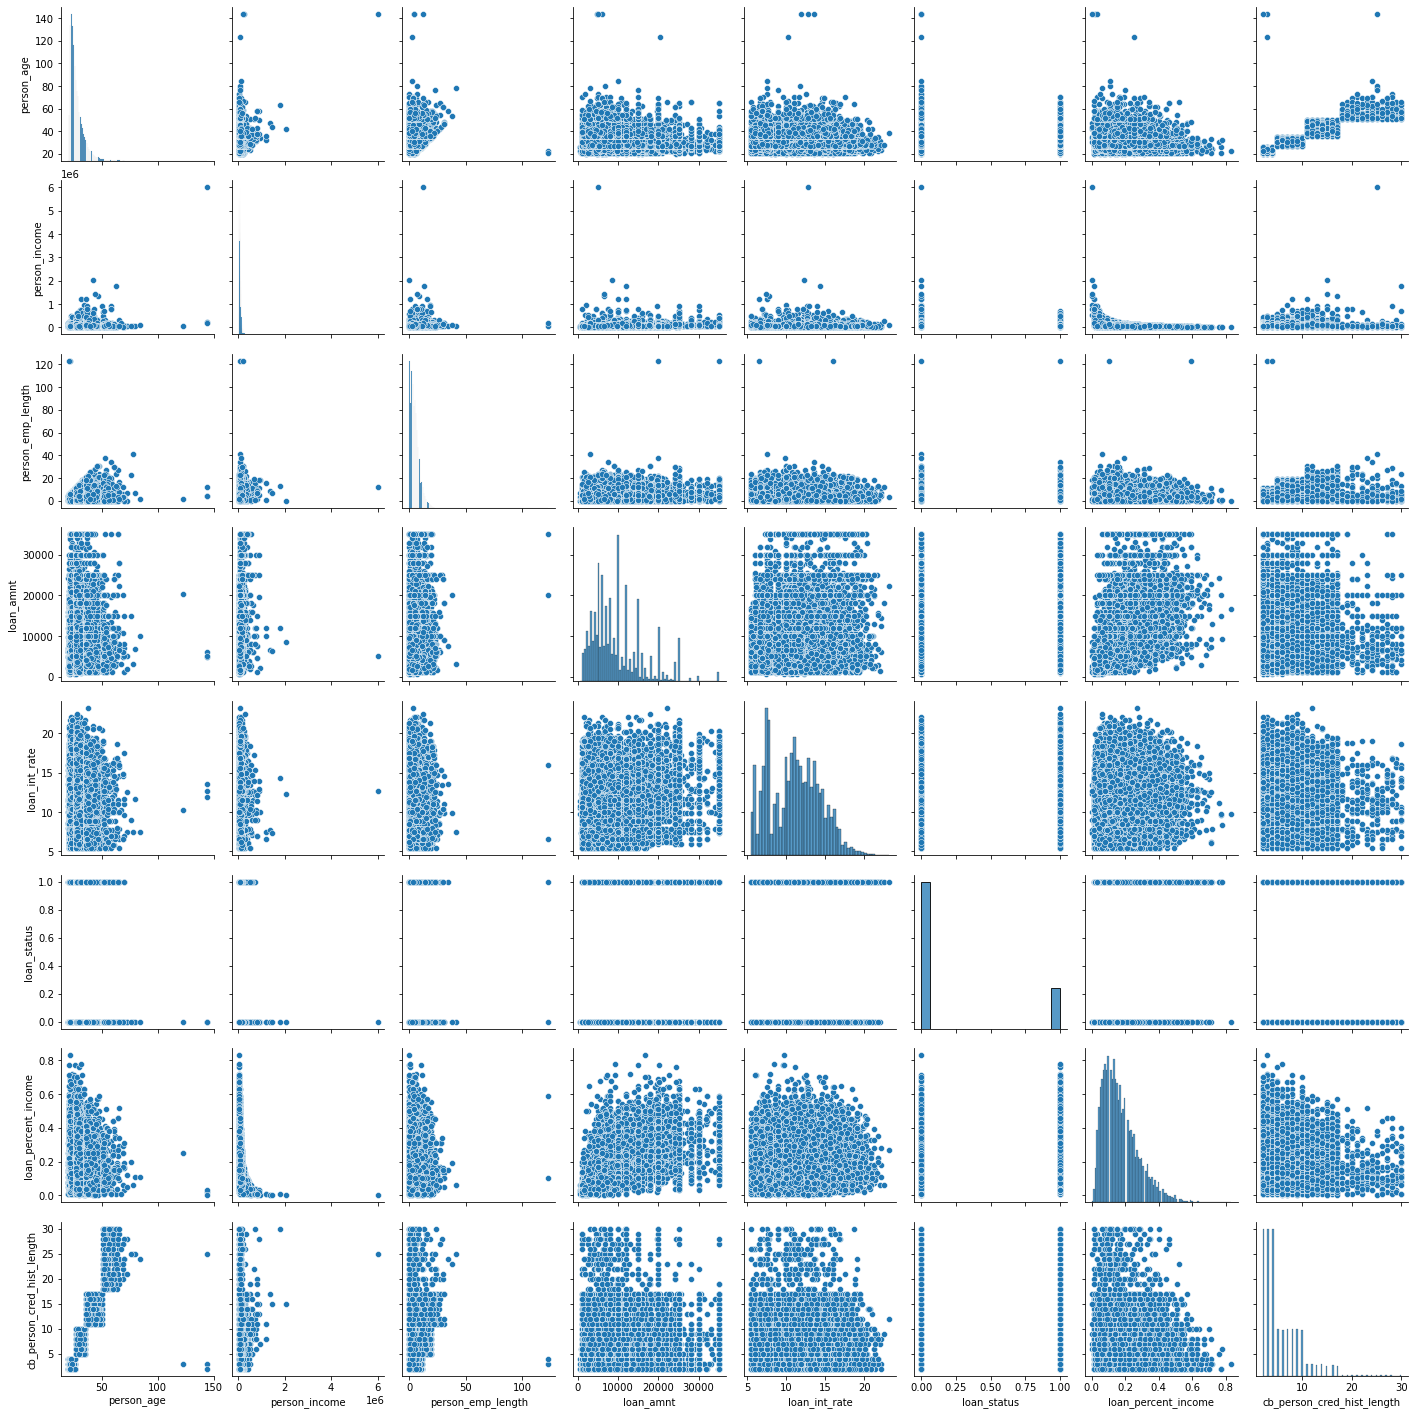

In [8]:
#matriz de los campos numéricos, relacion de las variables numéricas


seaborn.pairplot(df, vars = ['person_age','person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status'
                             ,'loan_percent_income','cb_person_cred_hist_length'])
plt.show()

<AxesSubplot:>

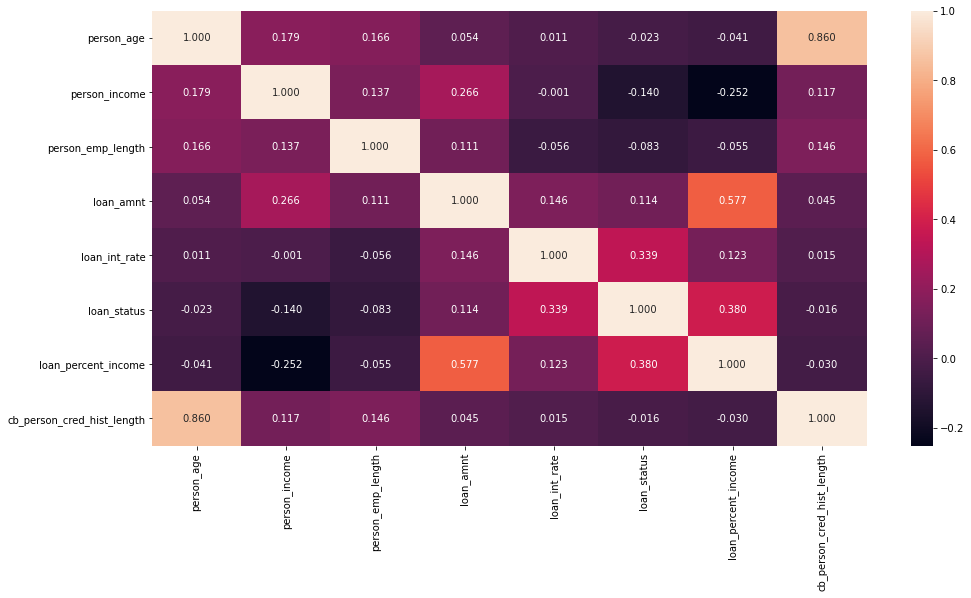

In [9]:
plt.figure(figsize=(16, 8))
seaborn.heatmap(df.corr(), annot=True, fmt='.3f')

# Pre-visualización de algunas variables de interes

## Visualización de variable objetivo riesgo crediticio

,loan_status
0,22435
1,6203


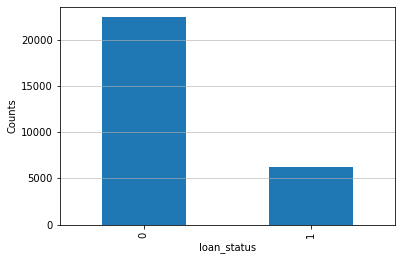

In [10]:
df['loan_status'].value_counts().plot(kind='bar')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('loan_status')
plt.ylabel('Counts')
display(pd.DataFrame(df['loan_status'].value_counts()))





## Visualización de destino del préstamo

In [11]:
dfObj = pd.DataFrame(index = ['0', '1'])

for x in ('DEBTCONSOLIDATION','EDUCATION','HOMEIMPROVEMENT','MEDICAL','PERSONAL','VENTURE'):
    #print("Valor",x)
    array=[]
    for j in (0,1):
        #print(j,":")
        y=(len(df[(df['loan_intent']==x) & (df['loan_status']== j)])/len(df[(df['loan_intent']==x)]))*100
        num=round(y, 2)
        array.append(num)
    dfObj[x] = array

dfObj

,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,71.61,82.98,74.33,73.15,80.25,85.38
1,28.39,17.02,25.67,26.85,19.75,14.62


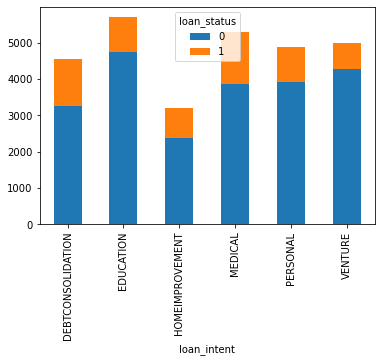

In [12]:
df.groupby(['loan_intent', 'loan_status'])['loan_status'].count().unstack().plot.bar(stacked=True)
plt.show()

## Visualización de puntuación 

In [13]:
dfObj = pd.DataFrame(index = ['0', '1'])

for x in ('A','B','C','D','F','G'):
    #print("Valor",x)
    array=[]
    for j in (0,1):
        y=(len(df[(df['loan_grade']==x) & (df['loan_status']== j)])/len(df[(df['loan_grade']==x)]))*100
        num=round(y, 2)
        array.append(num)
    dfObj[x] = array

dfObj

,A,B,C,D,F,G
0,90.39,84.12,79.7,40.79,30.14,1.69
1,9.61,15.88,20.3,59.21,69.86,98.31


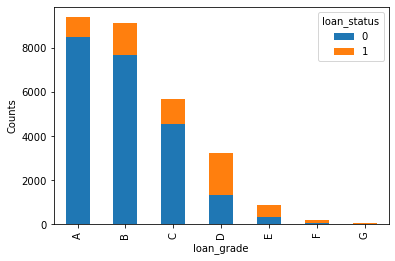

In [14]:
df.groupby(['loan_grade', 'loan_status'])['loan_status'].count().unstack().plot.bar(stacked=True)
plt.xlabel('loan_grade')
plt.ylabel('Counts')
plt.show()

## Visualización distribución por edad

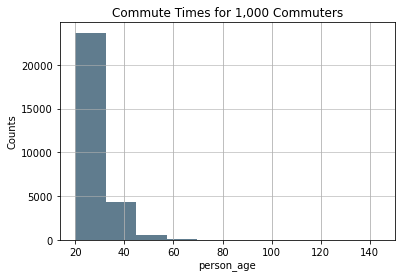

In [15]:
commutes = df['person_age']

commutes.plot.hist(grid=True,color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('person_age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

## Visualización distribución por tipo de interés

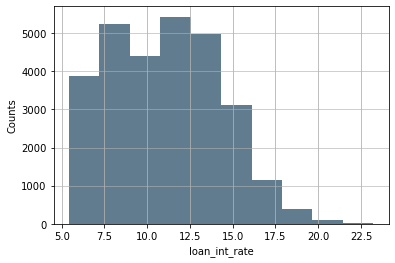

In [16]:
commutes = df['loan_int_rate']

commutes.plot.hist(grid=True,color='#607c8e')
#plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('loan_int_rate')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

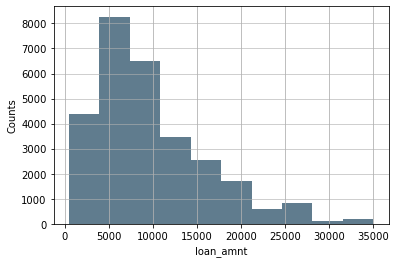

In [17]:
commutes = df['loan_amnt']
commutes.plot.hist(grid=True,color='#607c8e')
#plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('loan_amnt')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

# Localización de valores atípicos

In [18]:
df.loc[(df['person_income']>4e6)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
28388,144,6000000,MORTGAGE,12,PERSONAL,C,5000,12.73,0,0.0,N,25


In [19]:
df.loc[(df['person_age']>100)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
74,144,250000,RENT,4,VENTURE,C,4800,13.57,0,0.02,N,3
163,144,200000,MORTGAGE,4,EDUCATION,B,6000,11.86,0,0.03,N,2
508,123,80004,RENT,2,EDUCATION,B,20400,10.25,0,0.25,N,3
28388,144,6000000,MORTGAGE,12,PERSONAL,C,5000,12.73,0,0.00,N,25


In [20]:
df.loc[(df['person_emp_length'] >60)]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
186,21,192000,MORTGAGE,123,VENTURE,A,20000,6.54,0,0.10,N,4


In [21]:
#eliminamos los registros con valores atipicos, sobre todo relacionados con edad o tiempo de trabajo

df = df[df['person_emp_length']<=60]
df = df[df['person_income']<=4e6]
df = df[df['person_age']<=100]


## Visualización de los campos, después de eliminar los valores atípicos

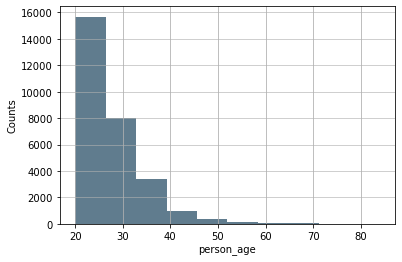

In [22]:
#volvemos a representar y quedan mejor arreglados.
commutes = df['person_age']

commutes.plot.hist(grid=True,color='#607c8e')
#plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('person_age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

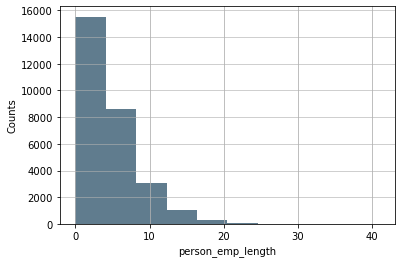

In [74]:
commutes = df['person_emp_length']

commutes.plot.hist(grid=True,color='#607c8e')
#plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('person_emp_length')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

### Dimensiones del dataframe con los valores eliminados

In [24]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,MORTGAGE,1,PERSONAL,C,5800,13.16,0,0.11,N,30
28634,54,120000,MORTGAGE,4,PERSONAL,A,17625,7.49,0,0.15,N,19
28635,65,76000,RENT,3,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28636,56,150000,MORTGAGE,5,PERSONAL,B,15000,11.48,0,0.10,N,26


### Representación de matriz de correlación de variables numéricas con los registros limpios

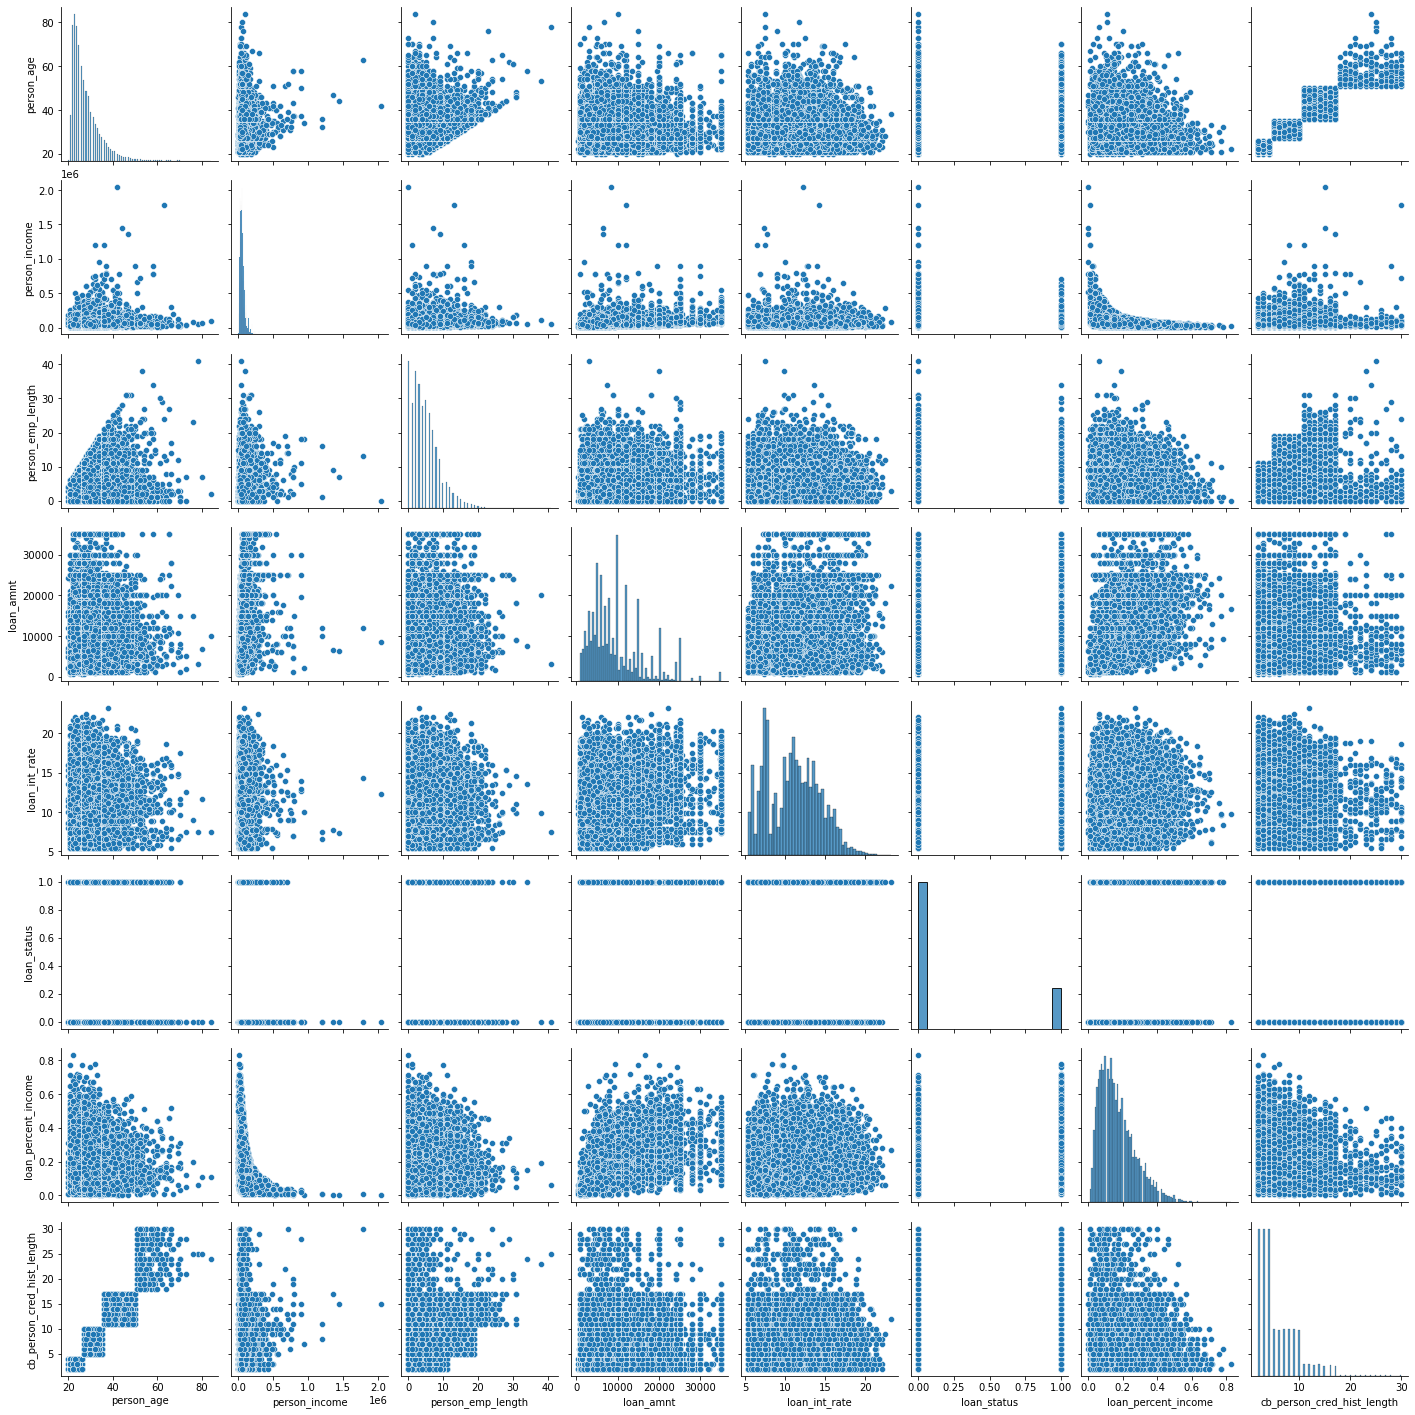

Wall time: 9.12 s


In [25]:
%%time
seaborn.pairplot(df, vars = ['person_age','person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status'
                             ,'loan_percent_income','cb_person_cred_hist_length'])
plt.show()

<AxesSubplot:>

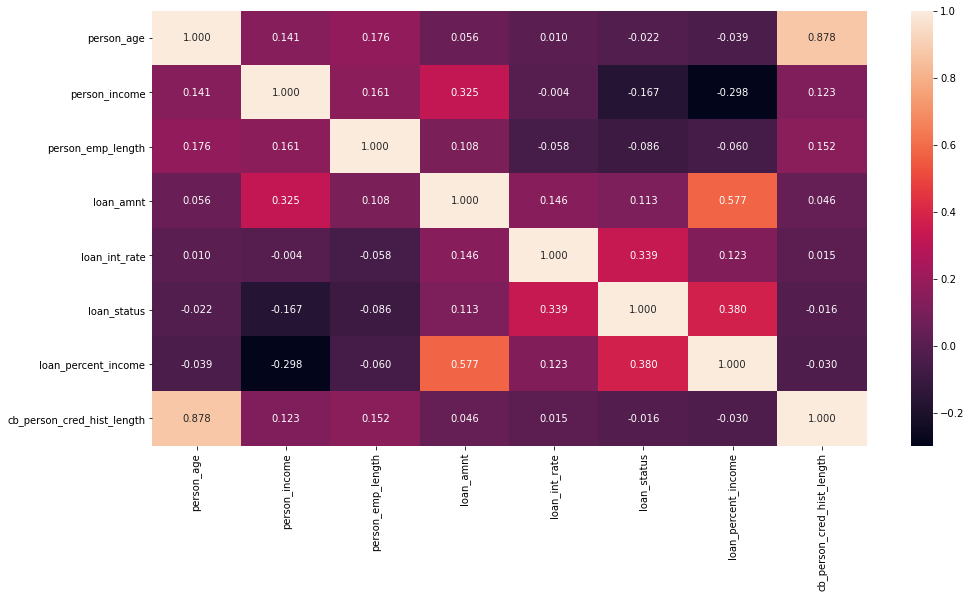

In [26]:
plt.figure(figsize=(16, 8))
seaborn.heatmap(df.corr(), annot=True, fmt='.3f')

In [27]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [28]:
#separamos las variables númericas
x = df.drop(columns = ['loan_status','person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'])
#separamos la variable objetivo
y = df['loan_status']
display(x.describe())



#normalizamos los campos numéricos
scaler = RobustScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)


display(x.describe())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,0.830000,30.000000


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,0.244591,0.259632,0.156063,0.220711,0.008907,0.139207,0.358711
std,0.881713,1.271395,0.807123,0.843706,0.578747,0.759723,0.807427
min,-0.857143,-1.280091,-0.800000,-1.000000,-0.998208,-1.071429,-0.400000
25%,-0.428571,-0.405584,-0.400000,-0.400000,-0.553763,-0.428571,-0.200000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.571429,0.594416,0.600000,0.600000,0.446237,0.571429,0.800000
max,8.285714,48.931630,7.400000,3.600000,2.191756,4.857143,5.200000


In [29]:
#añadimos al dataframe con los datos numéricos, los campos categóricos.
x['person_home_ownership']=df['person_home_ownership']
x['loan_intent']=df['loan_intent']
x['loan_grade']=df['loan_grade']
x['cb_person_default_on_file']=df['cb_person_default_on_file']
x

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1,-0.714286,-1.141969,0.2,-0.933333,0.026882,-0.357143,-0.4,OWN,EDUCATION,B,N
2,-0.142857,-1.141969,-0.6,-0.333333,0.336918,3.000000,-0.2,MORTGAGE,MEDICAL,C,N
3,-0.428571,0.236780,0.0,3.600000,0.759857,2.714286,-0.4,RENT,MEDICAL,C,N
4,-0.285714,-0.036997,0.8,3.600000,0.587814,2.857143,0.0,RENT,MEDICAL,C,Y
5,-0.714286,-1.134570,-0.4,-0.733333,-0.689964,0.714286,-0.4,OWN,VENTURE,A,N
...,...,...,...,...,...,...,...,...,...,...,...
28633,4.428571,-0.071527,-0.6,-0.293333,0.388889,-0.285714,5.2,MORTGAGE,PERSONAL,C,N
28634,4.000000,1.580998,0.0,1.283333,-0.627240,0.000000,3.0,MORTGAGE,PERSONAL,A,N
28635,5.571429,0.495758,-0.2,3.600000,0.000000,2.214286,4.8,RENT,HOMEIMPROVEMENT,B,N
28636,4.285714,2.320935,0.2,0.933333,0.087814,-0.357143,4.4,MORTGAGE,PERSONAL,B,N


In [30]:
#transformamos las variables categóricas en variables virtuales de 1 o 0 por casos
x=pd.get_dummies(x, columns=["person_home_ownership", "loan_intent","loan_grade","cb_person_default_on_file"], prefix=["ownership", "intent","loan_grade","cb_person_default_on_file"])

x

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,...,intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,-0.714286,-1.141969,0.2,-0.933333,0.026882,-0.357143,-0.4,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,-0.142857,-1.141969,-0.6,-0.333333,0.336918,3.000000,-0.2,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.428571,0.236780,0.0,3.600000,0.759857,2.714286,-0.4,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,-0.285714,-0.036997,0.8,3.600000,0.587814,2.857143,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,-0.714286,-1.134570,-0.4,-0.733333,-0.689964,0.714286,-0.4,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28633,4.428571,-0.071527,-0.6,-0.293333,0.388889,-0.285714,5.2,1,0,0,...,0,0,0,1,0,0,0,0,1,0
28634,4.000000,1.580998,0.0,1.283333,-0.627240,0.000000,3.0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
28635,5.571429,0.495758,-0.2,3.600000,0.000000,2.214286,4.8,0,0,0,...,0,0,1,0,0,0,0,0,1,0
28636,4.285714,2.320935,0.2,0.933333,0.087814,-0.357143,4.4,1,0,0,...,0,0,1,0,0,0,0,0,1,0


## Separamos los datos en dos conjuntos.

In [31]:
x_train_res, x_test, y_train_res, y_test = train_test_split(x, y, test_size = 0.2)


#imprimimos las dimensiones de los dos conjunts creados y el reparto de casos del campo clase. 

print('train')
display(x_train_res.shape)
print('test')
display(x_test.shape)
print('Reparto de casos train')
display(pd.DataFrame(y_train_res.value_counts()))

train


(22905, 26)

test


(5727, 26)

Reparto de casos train


,loan_status
0,17916
1,4989


,loan_status
0,17916
1,4989


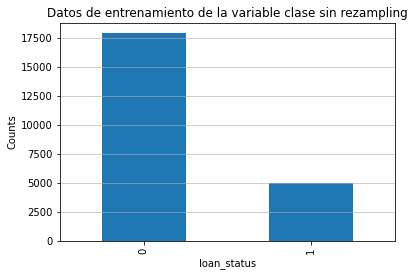

In [32]:
y_train_res.value_counts().plot(kind='bar')
plt.title('Datos de entrenamiento de la variable clase sin rezampling')
plt.xlabel('loan_status')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
display(pd.DataFrame(y_train_res.value_counts()))

,loan_status
0,4514
1,1213


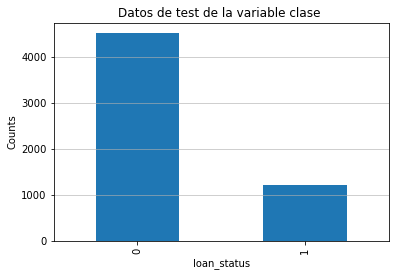

In [33]:
y_test.value_counts().plot(kind='bar')
plt.title('Datos de test de la variable clase ')
plt.xlabel('loan_status')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
display(pd.DataFrame(y_test.value_counts()))

## Redimensionado

In [34]:
#definimos la proporción de datos de la clase minoritaria vs la mayoritaria
os =  RandomOverSampler(sampling_strategy=0.4)

x_train, y_train = os.fit_resample(x_train_res, y_train_res)
print(" New 'x' has",x_train_res.shape," New 'Y' has",y_train_res.shape)
print('Original dataset shape {}'.format(Counter(y_train_res)))
print('Resampled dataset shape {}'.format(Counter(y_train)))

 New 'x' has (22905, 26)  New 'Y' has (22905,)
Original dataset shape Counter({0: 17916, 1: 4989})
Resampled dataset shape Counter({0: 17916, 1: 7166})


In [35]:
display(pd.DataFrame(y_test.value_counts()))
display(pd.DataFrame(y_train.value_counts()))

,loan_status
0,4514
1,1213


,loan_status
0,17916
1,7166


,loan_status
0,17916
1,7166


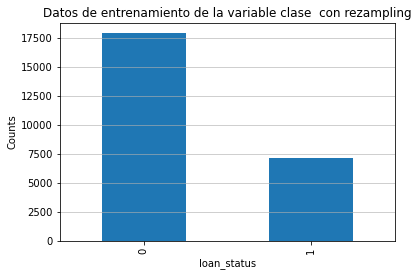

In [36]:
y_train.value_counts().plot(kind='bar')
plt.title('Datos de entrenamiento de la variable clase  con rezampling')
plt.xlabel('loan_status')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
display(pd.DataFrame(y_train.value_counts()))

# Creación de modelos 

## Random Forest 

In [37]:
%%time
# parameters candidates
parameters = {'n_estimators': [ 50, 100, 200,500],
              'max_depth': [2,3,4,5,6,7,8,9,10,11,12,15],
              'criterion': ['gini','entropy']
             }

# fitting
RandomForest_GSCV = GridSearchCV(RandomForestClassifier(random_state=1), 
                                 parameters, n_jobs=-1, verbose=3)
RandomForest_GSCV.fit(x_train, y_train)
RandomForest_model = RandomForest_GSCV.best_estimator_
RandomForest_model

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Wall time: 2min 2s


RandomForestClassifier(max_depth=15, n_estimators=200, random_state=1)

In [38]:
print(RandomForest_model.get_params())
print(f"Training Score: {round(RandomForest_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(RandomForest_model.score(x_test, y_test),4)}")

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Training Score: 0.9493
Testing Score: 0.9317


### Valores de entrenamiento

In [39]:
y_pred_train = RandomForest_model.predict(x_train)

print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[17902    14]
 [ 1258  5908]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     17916
           1       1.00      0.82      0.90      7166

    accuracy                           0.95     25082
   macro avg       0.97      0.91      0.93     25082
weighted avg       0.95      0.95      0.95     25082



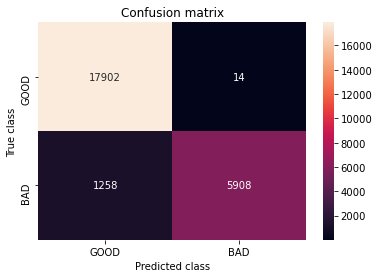

In [40]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred_train != y_train).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_train, y_pred_train.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Valores de test

In [41]:
y_pred = RandomForest_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4471   43]
 [ 348  865]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4514
           1       0.95      0.71      0.82      1213

    accuracy                           0.93      5727
   macro avg       0.94      0.85      0.89      5727
weighted avg       0.93      0.93      0.93      5727



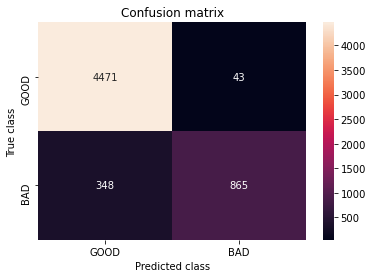

In [42]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred != y_test).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [43]:
d = {'feature importance':list(RandomForest_model.feature_importances_)}
table = pd.DataFrame(d, index=x_train.columns)
display(  table.sort_values('feature importance', ascending=False)  )

,feature importance
loan_percent_income,0.237835
loan_int_rate,0.135901
person_income,0.133313
loan_grade_D,0.064617
loan_amnt,0.060906
ownership_RENT,0.054930
person_emp_length,0.045952
person_age,0.029362
ownership_MORTGAGE,0.027984
loan_grade_C,0.024421


## Neural network

In [44]:
def build_model():
    model =keras.Sequential()# creamos el modelo
    model.add(keras.layers.Flatten(input_shape=(26,)))
    model.add(keras.layers.Dense(26, activation='sigmoid'))
    model.add(keras.layers.Dense(12, activation='sigmoid'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])
    return model

In [45]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 26)                0         
_________________________________________________________________
dense (Dense)                (None, 26)                702       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                324       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 1,039
Trainable params: 1,039
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train, epochs=57)

Epoch 1/57
784/784 [==============================] - 1s 453us/step - loss: 0.5956 - accuracy: 0.6552
Epoch 2/57
784/784 [==============================] - 0s 442us/step - loss: 0.3950 - accuracy: 0.8419
Epoch 3/57
784/784 [==============================] - 0s 441us/step - loss: 0.3833 - accuracy: 0.8462
Epoch 4/57
784/784 [==============================] - 0s 442us/step - loss: 0.3762 - accuracy: 0.8505
Epoch 5/57
784/784 [==============================] - 0s 442us/step - loss: 0.3687 - accuracy: 0.8533
Epoch 6/57
784/784 [==============================] - 0s 445us/step - loss: 0.3655 - accuracy: 0.8499
Epoch 7/57
784/784 [==============================] - 0s 445us/step - loss: 0.3600 - accuracy: 0.8531
Epoch 8/57
784/784 [==============================] - 0s 443us/step - loss: 0.3657 - accuracy: 0.8510
Epoch 9/57
784/784 [==============================] - 0s 446us/step - loss: 0.3501 - accuracy: 0.8610
Epoch 10/57
784/784 [==============================] - 0s 446us/step - loss: 0.351

In [48]:
loss, mae = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

loss, mae = model.evaluate(x_train, y_train, verbose=2)


print("Train set Mean Abs Error: {:5.2f}".format(mae))

179/179 - 0s - loss: 0.2408 - accuracy: 0.9183
Testing set Mean Abs Error:  0.92
784/784 - 0s - loss: 0.2568 - accuracy: 0.9048
Train set Mean Abs Error:  0.90


In [49]:
loss, mae = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

179/179 - 0s - loss: 0.2408 - accuracy: 0.9183
Testing set Mean Abs Error:  0.92


### Valores Entrenamiento

In [50]:
ent_predictions = model.predict(x_train).flatten()

In [51]:
y_pred_train =ent_predictions.round(0)


print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[17532   384]
 [ 2005  5161]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     17916
           1       0.93      0.72      0.81      7166

    accuracy                           0.90     25082
   macro avg       0.91      0.85      0.87     25082
weighted avg       0.91      0.90      0.90     25082



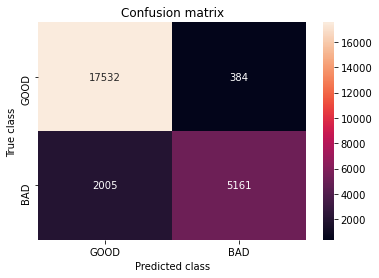

In [52]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred_train != y_train).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_train, y_pred_train.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Valores Test

In [53]:
test_predictions = model.predict(x_test).flatten()

In [54]:
y_pred=test_predictions.round(0)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4399  115]
 [ 353  860]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4514
           1       0.88      0.71      0.79      1213

    accuracy                           0.92      5727
   macro avg       0.90      0.84      0.87      5727
weighted avg       0.92      0.92      0.91      5727



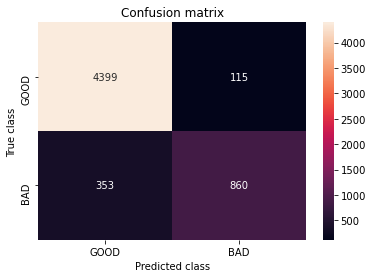

In [55]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred != y_test).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Gradient Boosting

In [56]:
%%time

# parameters candidates
parameters = {'max_depth': [6,7,8,9,10,11,12,13],
              'n_estimators': [50,100,200],
              'learning_rate': [0.01,0.02,0.015]}

# fitting
GradientBoost_GSCV = GridSearchCV(GradientBoostingClassifier(random_state=8017), 
                             parameters, n_jobs=-1, verbose=3)
GradientBoost_GSCV.fit(x_train, y_train)
GradientBoost_model = GradientBoost_GSCV.best_estimator_
GradientBoost_model

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Wall time: 6min 14s


GradientBoostingClassifier(learning_rate=0.02, max_depth=13, n_estimators=200,
                           random_state=8017)

In [57]:
# accuracy scores
print(GradientBoost_model.get_params())
print(f"Training Score: {round(GradientBoost_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(GradientBoost_model.score(x_test, y_test),4)}")

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.02, 'loss': 'deviance', 'max_depth': 13, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': 8017, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Score: 0.9735
Testing Score: 0.9305


### Valores entrenamiento

In [58]:
y_pred_train = GradientBoost_model.predict(x_train)


print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[17911     5]
 [  660  6506]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17916
           1       1.00      0.91      0.95      7166

    accuracy                           0.97     25082
   macro avg       0.98      0.95      0.97     25082
weighted avg       0.97      0.97      0.97     25082



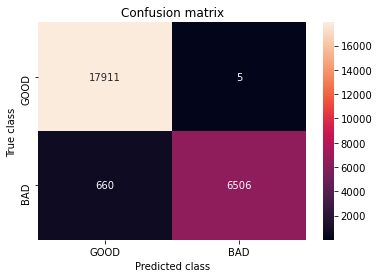

In [59]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred_train != y_train).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_train, y_pred_train.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Valores test

In [60]:
y_pred = GradientBoost_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4443   71]
 [ 327  886]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4514
           1       0.93      0.73      0.82      1213

    accuracy                           0.93      5727
   macro avg       0.93      0.86      0.89      5727
weighted avg       0.93      0.93      0.93      5727



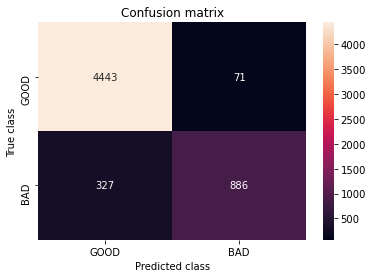

In [61]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred != y_test).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Logistic Regresion

In [62]:
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],
                   'max_iter': [100,150,250],
                    'tol': [0.0001, 0.0005,0.00005,0.001,0.01]
                   }
LogisticRegression_GSCV = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=5, scoring="accuracy")

LogisticRegression_GSCV.fit(x_train, y_train)
LogisticRegression_model = LogisticRegression_GSCV.best_estimator_
LogisticRegression_model

LogisticRegression(C=1, solver='liblinear', tol=0.0005)

In [63]:
print(LogisticRegression_model.get_params())


print(f"Training Score: {round(LogisticRegression_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(LogisticRegression_model.score(x_test, y_test),4)}")

{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0005, 'verbose': 0, 'warm_start': False}
Training Score: 0.8469
Testing Score: 0.8643


### Valores de entrenamiento

In [64]:
y_pred_train  = LogisticRegression_model.predict(x_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[16656  1260]
 [ 2581  4585]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     17916
           1       0.78      0.64      0.70      7166

    accuracy                           0.85     25082
   macro avg       0.83      0.78      0.80     25082
weighted avg       0.84      0.85      0.84     25082



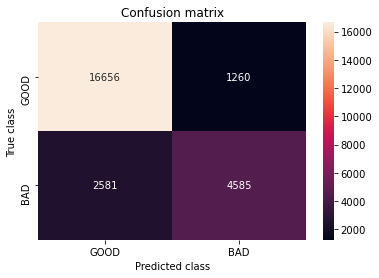

In [65]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred_train != y_train).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_train, y_pred_train.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Valores de test

In [66]:
y_pred = LogisticRegression_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4174  340]
 [ 437  776]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4514
           1       0.70      0.64      0.67      1213

    accuracy                           0.86      5727
   macro avg       0.80      0.78      0.79      5727
weighted avg       0.86      0.86      0.86      5727



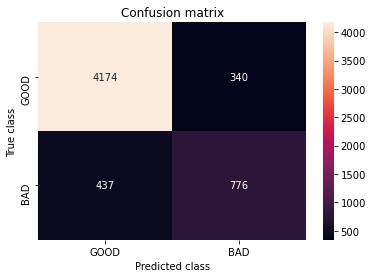

In [67]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred != y_test).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Decision Tree

In [68]:
parameters = {'max_depth':range(2,16),
             'criterion':['gini','entropy'],
             'min_samples_leaf':[3,4,5,6,7,8,10]}


DecisionTree_GSCV = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                                 parameters, n_jobs=-1, verbose=3, return_train_score=True)



DecisionTree_GSCV.fit(x_train, y_train)
DecisionTree_model = DecisionTree_GSCV.best_estimator_



Fitting 5 folds for each of 196 candidates, totalling 980 fits


In [69]:
print(DecisionTree_model.get_params())


print(f"Training Score: {round(DecisionTree_model.score(x_train, y_train),4)}")
print(f"Testing Score: {round(DecisionTree_model.score(x_test, y_test),4)}")

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
Training Score: 0.9261
Testing Score: 0.9296


### Valores de entrenamiento

In [70]:
y_pred_train  = DecisionTree_model.predict(x_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

[[17797   119]
 [ 1734  5432]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17916
           1       0.98      0.76      0.85      7166

    accuracy                           0.93     25082
   macro avg       0.94      0.88      0.90     25082
weighted avg       0.93      0.93      0.92     25082



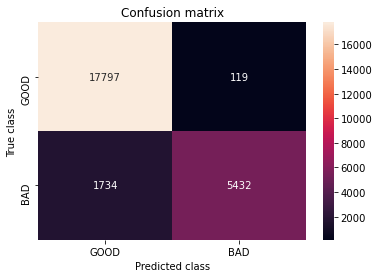

In [71]:
#printing the confusion matrix
#n_outliers = len(high_risk)
n_errors = (y_pred_train != y_train).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_train, y_pred_train.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Valores de Test

In [72]:
y_pred = DecisionTree_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4449   65]
 [ 338  875]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4514
           1       0.93      0.72      0.81      1213

    accuracy                           0.93      5727
   macro avg       0.93      0.85      0.88      5727
weighted avg       0.93      0.93      0.93      5727



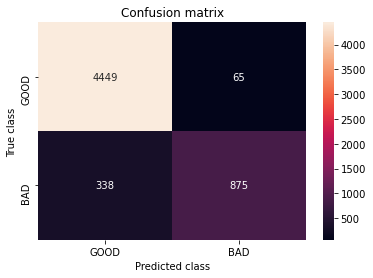

In [73]:
#printing the confusion matrix

n_errors = (y_pred != y_test).sum()
LABELS = ['GOOD', 'BAD']
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()